In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import scipy.io as sio
from fn_PSHA_given_M_lambda import fn_PSHA_given_M_lambda
from fn_GR_PSHA_sigma import fn_GR_PSHA_sigma
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
x = np.logspace(-3, np.log10(2), num=100)   # Considered IM values
T = 1   # 0.001 is the PGA case in the gmpe function
IM_label = 'Spectral Acceleration, SA(1s) [g]'
gmpeFlag = 1  # use BJF97

# seismicity parameters
rup = {}
rup["Fault_Type"] = 1  # 1 is strike slip
rup["Vs30"] = 500
rup["R"] = 10

# plotting parameters
figureAxisLimits = [min(x), max(x), 1e-5, 1e-1]
figureXTickVals = [0.05, 0.1, 0.5, 1, 2]

In [3]:
# Calculations
# From Table 3.5, \label{tab:grExample_mMax}, fixed rate of M>5, m_max = 8
lambda_M = [0.05, 0.03153, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492, 7.57e-05, 2.93e-05]
lambda_M2 = [0.03153, 0.03153, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492, 7.57e-05, 2.93e-05]
lambda_M3 = [0.01988, 0.01988, 0.01988, 0.01252, 0.007882, 0.004955, 0.003108, 0.001942, 0.001207, 0.0007432, 0.0004505, 0.0002657, 0.0001492, 7.57e-05, 2.93e-05]
M_vals = [5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9]
       
idx = 1 # idx of new M_min val
lambda_M2 = np.array(lambda_M)
lambda_M2[lambda_M2 >= lambda_M2[idx]] = lambda_M2[idx]

idx = 3 # idx of new M_min val
lambda_M3 = np.array(lambda_M)
lambda_M3[lambda_M3 >= lambda_M3[idx]] = lambda_M3[idx]

idx = 5 # idx of new M_min val
lambda_M4 = np.array(lambda_M)
lambda_M4[lambda_M4 >= lambda_M4[idx]] = lambda_M4[idx]

x_example = 0.2 # example values for table
lambda1, example_output, _ = fn_PSHA_given_M_lambda(np.array(lambda_M), M_vals, T, x, x_example, rup, gmpeFlag)

# minimum magnitude variation
lambda2, _, _ = fn_PSHA_given_M_lambda(lambda_M2, M_vals, T, x, x_example, rup, gmpeFlag)
lambda3, _, _ = fn_PSHA_given_M_lambda(lambda_M3, M_vals, T, x, x_example, rup, gmpeFlag)
lambda4, _, _ = fn_PSHA_given_M_lambda(lambda_M4, M_vals, T, x, x_example, rup, gmpeFlag)


[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

<Figure size 432x288 with 0 Axes>

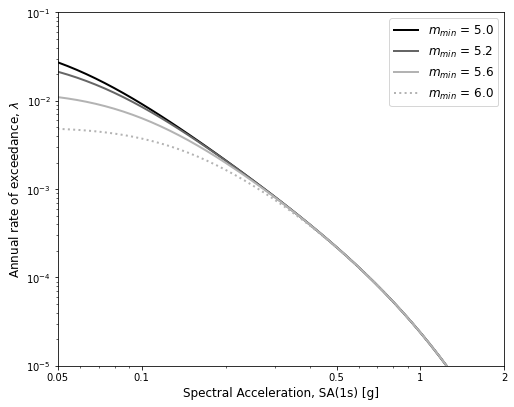

In [4]:
# Plot Fig 6.10: Minimum magnitude variation
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda1["x"], '-k', linewidth=2, label='$m_{min}$ = 5.0')
ax.loglog(x, lambda2["x"], linewidth=2, linestyle='-', color = [0.4, 0.4, 0.4], label='$m_{min}$ = 5.2')
ax.loglog(x, lambda3["x"], linewidth=2, linestyle='-', color = [0.7, 0.7, 0.7], label='$m_{min}$ = 5.6')
ax.loglog(x, lambda4["x"], linewidth=2, linestyle=':', color = [0.7, 0.7, 0.7], label='$m_{min}$ = 6.0')

ax.set_xlabel(IM_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(figureAxisLimits[2], figureAxisLimits[3])
ax.set_xlim(0.05, figureAxisLimits[1])
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)


[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

<Figure size 432x288 with 0 Axes>

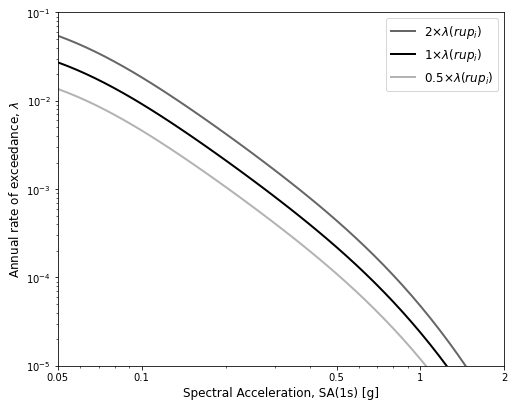

In [5]:
# Earthquake rate variation
lambdaCases = [2, 1, 0.5]
legendText = []
for i in range(len(lambdaCases)):
    legendText.append(str(lambdaCases[i]) + r'$\times\lambda(rup_i)$')
    
# earthquake rate variation
lambdaR1, _, _ = fn_PSHA_given_M_lambda(np.array(lambda_M)*lambdaCases[0], M_vals, T, x, x_example, rup, gmpeFlag)
lambdaR2, _, _ = fn_PSHA_given_M_lambda(np.array(lambda_M)*lambdaCases[1], M_vals, T, x, x_example, rup, gmpeFlag)
lambdaR3, _, _ = fn_PSHA_given_M_lambda(np.array(lambda_M)*lambdaCases[2], M_vals, T, x, x_example, rup, gmpeFlag)

# Plot fig 6.9
plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambdaR1["x"], linewidth=2, linestyle='-', color=[0.4, 0.4, 0.4], label=legendText[0])
ax.loglog(x, lambdaR2["x"], '-k', linewidth=2, label=legendText[1])
ax.loglog(x, lambdaR3["x"], linewidth=2, linestyle='-', color=[0.7, 0.7, 0.7], label=legendText[2])

ax.set_xlabel(IM_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(figureAxisLimits[2], figureAxisLimits[3])
ax.set_xlim(0.05, figureAxisLimits[1])
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)

[Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

<Figure size 432x288 with 0 Axes>

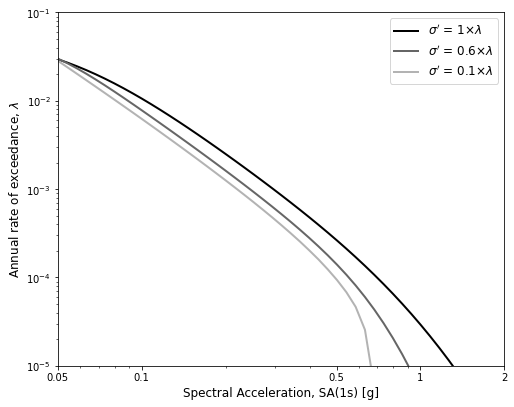

In [6]:
# GMM sigma variation
M_vals_new = np.arange(5.1, 7.9, step=0.05) # refine magnitude intervals to help with discretization artifacts in the small sigma case
interpF = interp1d(M_vals, np.log(lambda_M))
lambda_M_new = np.exp(interpF(M_vals_new))

sigmaFactor = [1, 0.6, 0.1]
legendText = []
for i in range(len(sigmaFactor)):
    legendText.append('$\sigma\'$ = ' + str(sigmaFactor[i]) + r'$\times\lambda$')
    
lambdaS1 = fn_GR_PSHA_sigma(lambda_M_new, M_vals_new, T, x, rup, sigmaFactor[0])
lambdaS2 = fn_GR_PSHA_sigma(lambda_M_new, M_vals_new, T, x, rup, sigmaFactor[1])
lambdaS3 = fn_GR_PSHA_sigma(lambda_M_new, M_vals_new, T, x, rup, sigmaFactor[2])

# Plot fig 6.12
plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambdaS1, '-k', linewidth=2, label=legendText[0])
ax.loglog(x, lambdaS2, linewidth=2, color=[0.4, 0.4, 0.4], label=legendText[1])
ax.loglog(x, lambdaS3, linewidth=2, color=[0.7, 0.7, 0.7], label=legendText[2])
ax.set_xlabel(IM_label, fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(figureAxisLimits[2], figureAxisLimits[3])
ax.set_xlim(0.05, figureAxisLimits[1])
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(figureXTickVals)
ax.set_xticklabels(figureXTickVals)
